### <font color = 'blue'>서울지역 스타벅스 매장정보 크롤링 
>-  서울지역 스타벅스 매장정보 크롤링
>-  서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율 = alpha x 100 >  / 스타벅스매장수/인구수)
>-  스벅비율 및 스벅매장수를 서울시 지도에 시각화
>-  스벅비율이 반영된 파일을 저장

In [1]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys
import re

In [2]:
# 웹 드라이브로 크롬 브라우져를 사용, 스타벅스 url 지정
driver = wd.Chrome(executable_path='./driver/chromedriver.exe')
url_page = 'https://www.starbucks.co.kr/index.do'
driver.get(url_page)

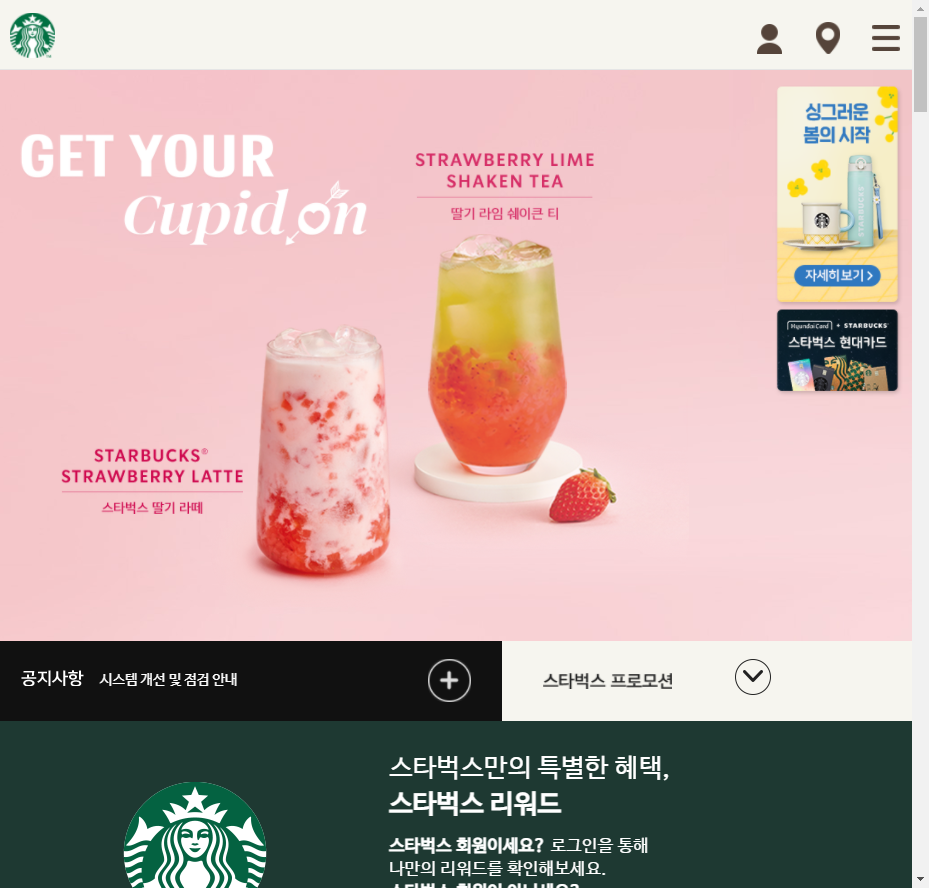

In [3]:
# 메인화면 캡쳐
capture_img = './images/starbucksmain.png'
driver.save_screenshot(capture_img)
Image(capture_img)

### 서울시 스타벅스 매장 정보 크롤링

In [5]:
# 페이지 이동(store)
driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03 > h2 > a').click()

In [6]:
# 페이지 이동(매장찾기)
driver.find_element_by_css_selector('#container > section.store_bn1_section > article > div.store_bn1_btn > a').click()

In [8]:
# 지역검색
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [9]:
# 서울
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [10]:
# 전체
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [11]:
# 현재 페이지정보 저장
html = driver.page_source
soup = bs(html, "lxml")
soup.title

<title id="titleJoin">Starbucks Coffee Korea</title>

In [12]:
main_tag = soup.find('div', 'result_list scrollbar-inner mCustomScrollbar _mCS_3')
main_tag.find()

<div class="mCustomScrollBox mCS-light mCSB_vertical mCSB_inside" id="mCSB_3" tabindex="0"><div class="mCSB_container" dir="ltr" id="mCSB_3_container" style="position:relative; top:0; left:0;">
<ul class="quickSearchResultBoxSidoGugun"><li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li><li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong>논현역사거리  <img alt="" class="setStoreFavBtn 

In [13]:
stores = main_tag.find_all('strong')
stores

[<strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>논현역사거리  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>신사역성일빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="신사역성일빌딩" data-store="1595" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>국기원사거리  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="국기원사거리" data-store="1527" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>스탈릿대치R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store

In [14]:
len(stores)

535

In [15]:
store = stores[0]
store

<strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>

In [16]:
storename = store.get_text().strip(' ')
storename

'역삼아레나빌딩'

In [17]:
storeinfos = main_tag.find_all('p','result_details')
storeinfo = storeinfos[0].get_text()
storeinfo

'서울특별시 강남구 언주로 425 (역삼동)1522-3232'

In [18]:
address = storeinfo.split('1522-3232')[0]
address

'서울특별시 강남구 언주로 425 (역삼동)'

In [19]:
tel = re.search('\d{4}[-]\d{4}' ,storeinfo).group()
tel

'1522-3232'

In [20]:
region = re.search('\w{1,3}구' ,address).group()
region

'강남구'

In [21]:
storeName = []
sbAddress = []
sbTel = []
sbRegion = []

cnt = len(stores)

for i in range(cnt):
    store = stores[i]
    storename = store.get_text().rstrip()
    
    storeinfo = storeinfos[i].get_text()
    address = storeinfo.split('1522-3232')[0]
    tel = re.search('\d{4}[-]\d{4}' ,storeinfo).group()
    region = re.search('\w{1,3}구' ,address).group()
    
    storeName.append(storename)
    sbAddress.append(address)
    sbTel.append(tel)
    sbRegion.append(region)
    
print('지역:{}, 매장:{}, 주소:{}, 전화:{}'.format(sbRegion, storeName, sbAddress, sbTel))

지역:['강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강북구', '강북구', '강북구', '강북구', '강북구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '금천구', '금천구', '금천구', '금천구', '금천구', '금천구', '금천구', '금천구', '금천구', '금천구', '금

In [22]:
starbucks = pd.DataFrame({'스타벅스매장': storeName, 
                          '구'          : sbRegion, 
                          '주소'        : sbAddress, 
                          '전화번호'    : sbTel, 
                         })

starbucks.head(10)

,스타벅스매장,구,주소,전화번호
0,역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),1522-3232
1,논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),1522-3232
2,신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),1522-3232
3,국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),1522-3232
4,스탈릿대치R,강남구,서울특별시 강남구 남부순환로 2947 (대치동),1522-3232
5,봉은사역,강남구,서울특별시 강남구 봉은사로 619 (삼성동),1522-3232
6,압구정윤성빌딩,강남구,서울특별시 강남구 논현로 834 (신사동),1522-3232
7,코엑스별마당,강남구,서울특별시 강남구 영동대로 513 (삼성동),1522-3232
8,삼성역섬유센터R,강남구,서울특별시 강남구 테헤란로 518 (대치동),1522-3232
9,압구정R,강남구,서울특별시 강남구 언주로 861 (신사동),1522-3232


In [23]:
starbucks["구"].unique()

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object)

In [24]:
sbucks_count = starbucks["구"].value_counts()
sbucks_count

강남구     84
중구      54
서초구     47
종로구     38
영등포구    34
마포구     32
송파구     32
서대문구    20
용산구     20
광진구     16
강동구     16
강서구     16
양천구     15
성북구     13
노원구     12
동작구     11
성동구     11
금천구     11
관악구     11
구로구     11
동대문구     8
은평구      8
중랑구      8
강북구      5
도봉구      2
Name: 구, dtype: int64

In [25]:
population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='euc-kr')
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,종로구,74861,159842,2.00,28396,17.765043
1,중구,63594,135321,1.98,24265,17.931437
2,용산구,112451,244953,2.04,39995,16.327622
3,성동구,136096,302695,2.17,45372,14.989346
4,광진구,166857,361923,2.09,50047,13.828079


In [26]:
# 구를 인덱스로 지정
population.set_index('구', inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
종로구,74861,159842,2.00,28396,17.765043
중구,63594,135321,1.98,24265,17.931437
용산구,112451,244953,2.04,39995,16.327622
성동구,136096,302695,2.17,45372,14.989346
광진구,166857,361923,2.09,50047,13.828079


In [27]:
population = pd.concat([population, sbucks_count], axis=1)
population.head(10)

,세대,인구수,세대당인구,65세이상고령자,고령비율,구
종로구,74861,159842,2.00,28396,17.765043,38
중구,63594,135321,1.98,24265,17.931437,54
용산구,112451,244953,2.04,39995,16.327622,20
성동구,136096,302695,2.17,45372,14.989346,11
광진구,166857,361923,2.09,50047,13.828079,16
동대문구,167232,358679,2.06,61408,17.120601,8
중랑구,185109,400989,2.14,68658,17.122165,8
성북구,195379,449871,2.25,73370,16.309120,13
강북구,145790,313550,2.13,62951,20.076862,5
도봉구,139029,329300,2.35,61388,18.641968,2


In [28]:
population.rename(columns = {'구':'스타벅스'}, inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스
종로구,74861,159842,2.00,28396,17.765043,38
중구,63594,135321,1.98,24265,17.931437,54
용산구,112451,244953,2.04,39995,16.327622,20
성동구,136096,302695,2.17,45372,14.989346,11
광진구,166857,361923,2.09,50047,13.828079,16


In [29]:
population['스타벅스'] / population['인구수'] * 100 * 10000

종로구     237.734763
중구      399.051145
용산구      81.648316
성동구      36.340210
광진구      44.208298
동대문구     22.304066
중랑구      19.950672
성북구      28.897173
강북구      15.946420
도봉구       6.073489
노원구      22.661520
은평구      16.466259
서대문구     61.755079
마포구      83.443287
양천구      32.605293
강서구      27.139988
구로구      25.243775
금천구      44.063275
영등포구     83.747555
동작구      27.186203
관악구      21.377695
서초구     109.303597
강남구     154.387642
송파구      47.290198
강동구      34.611433
dtype: float64

In [30]:
population['스벅비율'] = population['스타벅스'] / population['인구수'] * 100 * 10000

In [31]:
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
종로구,74861,159842,2.00,28396,17.765043,38,237.734763
중구,63594,135321,1.98,24265,17.931437,54,399.051145
용산구,112451,244953,2.04,39995,16.327622,20,81.648316
성동구,136096,302695,2.17,45372,14.989346,11,36.340210
광진구,166857,361923,2.09,50047,13.828079,16,44.208298


In [32]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

## 데이터 시각화 FOLIUM
### 스타벅스 매장수를 시각화

In [33]:
sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스타벅스']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbucksData,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

map

### 인구수 대비 스타벅스의 비율 시각화

In [34]:
sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스벅비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbucksData,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

map

### 결론
- 마무리

In [37]:
population.sort_values(by=["스벅비율"],ascending=False)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
중구,63594,135321,1.98,24265,17.931437,54,399.051145
종로구,74861,159842,2.00,28396,17.765043,38,237.734763
강남구,234021,544085,2.30,73942,13.590156,84,154.387642
서초구,173483,429995,2.46,59495,13.836207,47,109.303597
영등포구,182087,405982,2.06,60826,14.982438,34,83.747555
마포구,178495,383494,2.09,54053,14.094875,32,83.443287
용산구,112451,244953,2.04,39995,16.327622,20,81.648316
서대문구,144494,323860,2.17,53869,16.633422,20,61.755079
송파구,281417,676673,2.38,92149,13.617951,32,47.290198
광진구,166857,361923,2.09,50047,13.828079,16,44.208298
